<a href="https://colab.research.google.com/github/ArjunVerma/Digit-Recognition/blob/master/Digit_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, models, layers

In [0]:
(train_images, train_labels), (test_images, test_labels) = (datasets.mnist).load_data()

In [0]:
print(train_images.shape, '\n', test_images.shape)

(60000, 28, 28) 
 (10000, 28, 28)


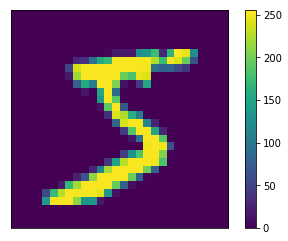

In [0]:
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [0]:
train_images , test_images = train_images.reshape((60000, 28, 28, 1)), test_images.reshape((10000, 28, 28, 1))

In [0]:
train_images, test_images = train_images/255.0, test_images/255.0

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation= 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
__________

In [0]:
model.compile(optimizer= 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 12s 194us/sample - loss: 0.1427 - acc: 0.9566
Epoch 2/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0478 - acc: 0.9846
Epoch 3/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0337 - acc: 0.9895
Epoch 4/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0258 - acc: 0.9919
Epoch 5/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0203 - acc: 0.9933


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.0317 - acc: 0.9910


In [0]:
print('Accuracy : ', round(test_acc * 100, 2), '%')

Accuracy :  99.1 %
